# Compare two methods of assessing skin tone

This notebook demonstrates how to use the **preprocess** and **detection** functions to implement two methods of assessing skin tone in black & white photos -- then, use **conf_matrix**, **mse**, and **pcp** to assess which one worked better.

### Import packages

Import relevant dependencies:

Set working directory to the tonelocator repo:

In [1]:
%cd ..

/Users/elizabethpelletier/tonelocator


In [2]:
from tonelocator import preprocess

Set working directory to directory that contains the tonelocator repo:

In [3]:
%cd ..

/Users/elizabethpelletier


In [4]:
import os
import sys
import pandas as pd
import numpy as np
import cv2
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from tonelocator import detection, conf_matrix, mse, pcp
from tonelocator.colorizer import colorizer

### Create array of image file names and list of photos

Next, create an array that lists the file names of all the photos you want to run the tonelocator complexion detection methods on. 

Replace 'folder' below with the file path to a folder that will contain your photos. Fill a subfolder "photos/examples_unprocessed" with the photos you wish to use in this analysis.

In [5]:
# Create subfolders to contain preprocessed color photos,
# B&W versions of those photos, and colorized versions
# of the B&W photos
folder = 'tonelocator/example/photos'
!mkdir $folder/color
!mkdir $folder/grayscale
!mkdir $folder/colorized

Get a list of image names and paths for the set of photos we'll work with:

In [6]:
imgpaths_preproc = []
imgnames_preproc = []
for file in os.listdir(folder + '/examples_unprocessed'):
    if not file.startswith('.'):
        imgpaths_preproc.append(os.path.join(folder + '/examples_unprocessed', file))
        imgnames_preproc.append(file)
imgpaths_preproc = np.sort(imgpaths_preproc)
imgnames_preproc = np.sort(imgnames_preproc)
print(imgpaths_preproc)
print(imgnames_preproc)

['tonelocator/example/photos/examples_unprocessed/AJ_Cook_0001.jpg'
 'tonelocator/example/photos/examples_unprocessed/AJ_Lamas_0001.jpg'
 'tonelocator/example/photos/examples_unprocessed/Aaron_Eckhart_0001.jpg'
 ...
 'tonelocator/example/photos/examples_unprocessed/Zumrati_Juma_0001.jpg'
 'tonelocator/example/photos/examples_unprocessed/Zurab_Tsereteli_0001.jpg'
 'tonelocator/example/photos/examples_unprocessed/Zydrunas_Ilgauskas_0001.jpg']
['AJ_Cook_0001.jpg' 'AJ_Lamas_0001.jpg' 'Aaron_Eckhart_0001.jpg' ...
 'Zumrati_Juma_0001.jpg' 'Zurab_Tsereteli_0001.jpg'
 'Zydrunas_Ilgauskas_0001.jpg']


### Pre-process photos

Next, pre-process the photos into three sets of files: 
1. the cropped color photos that we'll use to detect the "true" color composition of the photos 
2. the cropped grayscale photos that we'll use to test our B&W Monk Scale detection methods on
3. colorized versions of the grayscale photos that we'll used to test B&W Monk Scale detection method 2

The **preprocess** module crops the photos and has an option to convert them to grayscale. The **colorizer** module is used to colorize B&W photos. 

Use preprocess.face_crop to create cropped color and black & white versions of the faces. Note that the preprocessor is not always able to detect a face, resulting in some errors. However, there are a small number of errors relative to the total number of photos. 

In [20]:
# Color versions
for pic in imgnames_preproc:
    try:
        face = preprocess.face_crop(image_path = os.path.join(folder + '/examples_unprocessed/' + pic),
                                    to_gray = False,
                                    gaussian_blur = False)
        data=cv2.imencode('.png', face)[1].tobytes()
        cv2.imwrite(os.path.join(folder + '/color/' + pic), face)
    except:
        print('error: ' + pic)

error: Andy_Roddick_0010.jpg
error: Ariel_Sharon_0017.jpg
error: Arnold_Schwarzenegger_0036.jpg
error: Barbara_Boxer_0001.jpg
error: Barbara_Esbin_0001.jpg
error: Ben_Curtis_0001.jpg
error: Bill_Clinton_0012.jpg
error: Brandon_Larson_0001.jpg
error: Brandon_Webb_0001.jpg
error: Brian_Lara_0001.jpg
error: Brian_Schneider_0001.jpg
error: Budd_Schulberg_0001.jpg
error: Buddy_Ryan_0001.jpg
error: Charles_Mathews_0002.jpg
error: Christian_Fittipaldi_0002.jpg
error: Clive_Lloyd_0001.jpg
error: Colin_Powell_0227.jpg
error: Darvis_Patton_0001.jpg
error: Dereck_Whittenburg_0001.jpg
error: George_HW_Bush_0002.jpg
error: George_P_Bush_0001.jpg
error: Gerhard_Schroeder_0100.jpg
error: Hernan_Diaz_0001.jpg
error: Irwan_Fadzi_Idris_0001.jpg
error: James_McGreevey_0002.jpg
error: Jelena_Dokic_0004.jpg
error: Jennifer_Capriati_0017.jpg
error: Jerry_Rice_0001.jpg
error: Jim_Parque_0001.jpg
error: John_Bolton_0005.jpg
error: John_Bolton_0008.jpg
error: John_Burkett_0001.jpg
error: Juan_Pablo_Montoya_000

In [23]:
# B&W versions
for pic in imgnames_preproc:
    try:
        facegray = preprocess.face_crop(image_path = os.path.join(folder + '/examples_unprocessed/' + pic),
                                    to_gray = True,
                                    gaussian_blur = False)
        data=cv2.imencode('.png', facegray)[1].tobytes()
        cv2.imwrite(os.path.join(folder + '/grayscale/' + pic), facegray)
    except:
        print('error :' + pic)

error :Andy_Roddick_0010.jpg
error :Ariel_Sharon_0017.jpg
error :Arnold_Schwarzenegger_0036.jpg
error :Barbara_Boxer_0001.jpg
error :Barbara_Esbin_0001.jpg
error :Ben_Curtis_0001.jpg
error :Bill_Clinton_0012.jpg
error :Brandon_Larson_0001.jpg
error :Brandon_Webb_0001.jpg
error :Brian_Lara_0001.jpg
error :Brian_Schneider_0001.jpg
error :Budd_Schulberg_0001.jpg
error :Buddy_Ryan_0001.jpg
error :Charles_Mathews_0002.jpg
error :Christian_Fittipaldi_0002.jpg
error :Clive_Lloyd_0001.jpg
error :Colin_Powell_0227.jpg
error :Darvis_Patton_0001.jpg
error :Dereck_Whittenburg_0001.jpg
error :George_HW_Bush_0002.jpg
error :George_P_Bush_0001.jpg
error :Gerhard_Schroeder_0100.jpg
error :Hernan_Diaz_0001.jpg
error :Irwan_Fadzi_Idris_0001.jpg
error :James_McGreevey_0002.jpg
error :Jelena_Dokic_0004.jpg
error :Jennifer_Capriati_0017.jpg
error :Jerry_Rice_0001.jpg
error :Jesus_Cardenal_0001.jpg
error :Jim_Parque_0001.jpg
error :John_Bolton_0005.jpg
error :John_Bolton_0008.jpg
error :John_Burkett_0001.jp

In [7]:
# Gather a list of all the black & white and color images and file paths 

imgpaths_gray = []
imgnames_gray = []
for file in os.listdir(folder + '/grayscale'):
    if not file.startswith('.'):
        imgpaths_gray.append(os.path.join(folder + '/grayscale', file))
        imgnames_gray.append(file.replace('gray_', ''))
imgpaths_gray = np.sort(imgpaths_gray)
imgnames_gray = np.sort(imgnames_gray)
print(imgpaths_gray)
print(imgnames_gray)

imgpaths_color = []
imgnames_color = []
for file in os.listdir(folder + '/color'):
    if not file.startswith('.'):
        imgpaths_color.append(os.path.join(folder + '/color', file))
        imgnames_color.append(file)
imgpaths_color = np.sort(imgpaths_color)
imgnames_color = np.sort(imgnames_color)
print(imgpaths_color)
print(imgnames_color)

['tonelocator/example/photos/grayscale/AJ_Cook_0001.jpg'
 'tonelocator/example/photos/grayscale/AJ_Lamas_0001.jpg'
 'tonelocator/example/photos/grayscale/Aaron_Eckhart_0001.jpg' ...
 'tonelocator/example/photos/grayscale/Zumrati_Juma_0001.jpg'
 'tonelocator/example/photos/grayscale/Zurab_Tsereteli_0001.jpg'
 'tonelocator/example/photos/grayscale/Zydrunas_Ilgauskas_0001.jpg']
['AJ_Cook_0001.jpg' 'AJ_Lamas_0001.jpg' 'Aaron_Eckhart_0001.jpg' ...
 'Zumrati_Juma_0001.jpg' 'Zurab_Tsereteli_0001.jpg'
 'Zydrunas_Ilgauskas_0001.jpg']
['tonelocator/example/photos/color/AJ_Cook_0001.jpg'
 'tonelocator/example/photos/color/AJ_Lamas_0001.jpg'
 'tonelocator/example/photos/color/Aaron_Eckhart_0001.jpg' ...
 'tonelocator/example/photos/color/Zumrati_Juma_0001.jpg'
 'tonelocator/example/photos/color/Zurab_Tsereteli_0001.jpg'
 'tonelocator/example/photos/color/Zydrunas_Ilgauskas_0001.jpg']
['AJ_Cook_0001.jpg' 'AJ_Lamas_0001.jpg' 'Aaron_Eckhart_0001.jpg' ...
 'Zumrati_Juma_0001.jpg' 'Zurab_Tsereteli_0001

In [ ]:
# Colorize each grayscale and save in 'colorized' output folder
for pic in imgnames_gray:
    """
    Loop through every file in the grayscale folder, colorize them, and save the colorized image to the output folder.
    """
    imgpath = folder + "/grayscale/" + pic
    outpath = folder + "/colorized/" + pic
    data=cv2.imencode('.png', colorized)[1].tobytes()
    cv2.imwrite(outpath, colorized)

In [8]:
# gather names of the colorized photos and file paths 
imgpaths_colorized = []
imgnames_colorized = []
for file in os.listdir(folder + '/colorized'):
    if not file.startswith('.'):
        imgpaths_colorized.append(os.path.join(folder + '/colorized', file))
        imgnames_colorized.append(file)
imgpaths_colorized = np.sort(imgpaths_colorized)
imgnames_colorized = np.sort(imgnames_colorized)
print(imgpaths_colorized)
print(imgnames_colorized)

['tonelocator/example/photos/colorized/AJ_Cook_0001.jpg'
 'tonelocator/example/photos/colorized/AJ_Lamas_0001.jpg'
 'tonelocator/example/photos/colorized/Aaron_Eckhart_0001.jpg' ...
 'tonelocator/example/photos/colorized/Zumrati_Juma_0001.jpg'
 'tonelocator/example/photos/colorized/Zurab_Tsereteli_0001.jpg'
 'tonelocator/example/photos/colorized/Zydrunas_Ilgauskas_0001.jpg']
['AJ_Cook_0001.jpg' 'AJ_Lamas_0001.jpg' 'Aaron_Eckhart_0001.jpg' ...
 'Zumrati_Juma_0001.jpg' 'Zurab_Tsereteli_0001.jpg'
 'Zydrunas_Ilgauskas_0001.jpg']


### Detect Monk scale based on color photos - the 'true' result we'll compare our detection methods to

Next, use the **complexion_detection** function to detect the color composition of the color photos. This is the 'true' result we'll use as a baseline to compare against the two methods of detecting complexion from B&W photos. 

In [9]:
true_results = np.array([detection.complexion_detection(i, rounding_places=2, grayscale=False) 
                                  for i in imgpaths_color])
true_df = pd.DataFrame(true_results)
true_df['picid'] = imgnames_color
true_df.head()

,0,1,2,3,4,5,6,7,8,9,picid
0,0.0,0.0,0.0,0.0,0.44,0.12,0.04,0.00,0.00,0.0,AJ_Cook_0001.jpg
1,0.0,0.0,0.0,0.0,0.25,0.05,0.05,0.01,0.00,0.0,AJ_Lamas_0001.jpg
2,0.0,0.0,0.0,0.0,0.30,0.09,0.08,0.04,0.01,0.0,Aaron_Eckhart_0001.jpg
3,0.0,0.0,0.0,0.0,0.28,0.08,0.15,0.03,0.00,0.0,Aaron_Guiel_0001.jpg
4,0.0,0.0,0.0,0.0,0.29,0.00,0.01,0.01,0.00,0.0,Aaron_Patterson_0001.jpg


### METHOD 1: Detect Monk scale based on B&W versions of color photos and reference to B&W Monk scale

In [10]:
m1_results = np.array([detection.complexion_detection(i, 
                                                      rounding_places=2,
                                                     grayscale=True) 
                                  for i in imgpaths_gray])
m1pred_df = pd.DataFrame(m1_results)
m1pred_df['picid'] = imgnames_gray
m1pred_df.head()

,0,1,2,3,4,5,6,7,8,9,picid
0,0.0,0.0,0.0,0.00,0.48,0.23,0.14,0.07,0.03,0.01,AJ_Cook_0001.jpg
1,0.0,0.0,0.0,0.01,0.32,0.25,0.13,0.07,0.05,0.02,AJ_Lamas_0001.jpg
2,0.0,0.0,0.0,0.02,0.44,0.18,0.18,0.11,0.04,0.01,Aaron_Eckhart_0001.jpg
3,0.0,0.0,0.0,0.00,0.32,0.22,0.28,0.15,0.02,0.00,Aaron_Guiel_0001.jpg
4,0.0,0.0,0.0,0.00,0.45,0.21,0.19,0.17,0.00,0.00,Aaron_Patterson_0001.jpg


### METHOD 2: Detect Monk scale based on colorized photo

In [11]:
m2_results = np.array([detection.complexion_detection(i, 
                                                      rounding_places=2,
                                                     grayscale=False) 
                                  for i in imgpaths_colorized])
m2pred_df = pd.DataFrame(m2_results)
m2pred_df['picid'] = imgnames_colorized
m2pred_df.head()

,0,1,2,3,4,5,6,7,8,9,picid
0,0.0,0.0,0.0,0.0,0.36,0.03,0.01,0.00,0.0,0.0,AJ_Cook_0001.jpg
1,0.0,0.0,0.0,0.0,0.24,0.07,0.04,0.01,0.0,0.0,AJ_Lamas_0001.jpg
2,0.0,0.0,0.0,0.0,0.28,0.04,0.01,0.00,0.0,0.0,Aaron_Eckhart_0001.jpg
3,0.0,0.0,0.0,0.0,0.23,0.04,0.02,0.00,0.0,0.0,Aaron_Guiel_0001.jpg
4,0.0,0.0,0.0,0.0,0.20,0.03,0.01,0.00,0.0,0.0,Aaron_Patterson_0001.jpg


### Compare effectiveness of each method

First, make sure that the IDs in each dataset are the same and uniquely identify the photos. Otherwise, you'll get errors in the conf_matrix, mse, and pcp functions.

In [18]:
# preprocess dataframes so that all picid's in the true DF are in the pred DF and vice versa
picids = list(m1pred_df['picid'])
inpred = true_df.picid.isin(picids)
true_df_final = true_df[inpred]
print(len(true_df))
print(len(true_df_final))
# one row dropped from true_df

13170
13169


In [19]:
# preprocess dataframes so that all picid's in the true DF are in the pred DF and vice versa
picids = list(true_df_final['picid'])
inpred = m1pred_df.picid.isin(picids)
m1pred_df_final = m1pred_df[inpred]
print(len(m1pred_df))
print(len(m1pred_df_final))
# all IDs in m1pred are in true

13169
13169


In [22]:
# preprocess dataframes so that all picid's in the true DF are in the pred DF and vice versa
picids = list(true_df_final['picid'])
inpred = m2pred_df.picid.isin(picids)
m2pred_df_final = m2pred_df[inpred]
print(len(m2pred_df))
print(len(m2pred_df_final))
# all IDs in m2pred are in true

13169
13169


Next, create a confusion matrix for each method. 

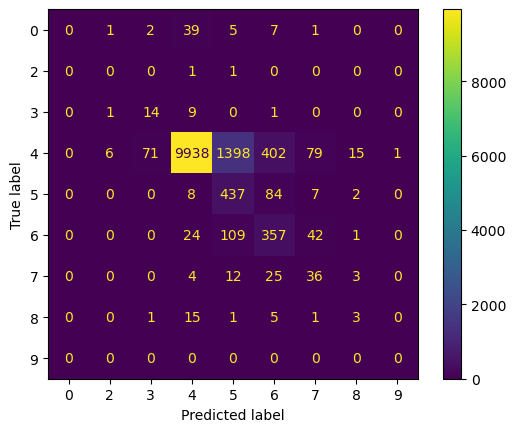

In [20]:
conf_matrix.conf_matrix(true=true_df_final, pred=m1pred_df_final).plot()

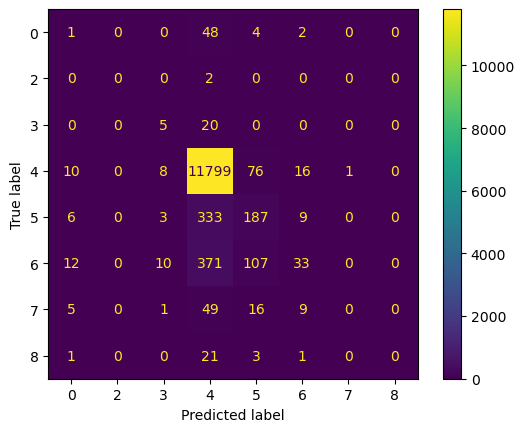

In [23]:
conf_matrix.conf_matrix(true=true_df_final, pred=m2pred_df_final).plot()

The confusion matrices suggest that Method 2 performed better than Method 1.

In [28]:
print('Share correctly predicted, Method 1: ' + 
      str(round(pcp.pcp(true = true_df_final, pred = m1pred_df_final), 3)))
print('Share correctly predicted, Method 2: ' + 
      str(round(pcp.pcp(true = true_df_final, pred = m2pred_df_final), 3)))

Share correctly predicted, Method 1: 0.819
Share correctly predicted, Method 2: 0.913


The percent correctly predicted was also higher for Method 2. 

Calculate the MSE for each method:

In [34]:
print('MSE, method 1: ' +
      str(round(mse.mse(true=true_df_final, pred=m1pred_df_final, bybin=False), 3)))
print('MSE, method 2: ' +
      str(round(mse.mse(true=true_df_final, pred=m2pred_df_final, bybin=False), 3)))

MSE, method 1: 0.01
MSE, method 2: 0.001


The mean squared error of the second method, using the colorizer, is lower than the MSE for the first method. 